In [183]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [173]:
# Montar Google Drive
drive.mount('/content/drive')

# Cargar el dataset
file_path = '/content/drive/My Drive/Grupo 5 Utec/Machine Learning/Presencial/bike_sharing.csv'  # Actualiza la ruta según sea necesario

# Leer el archivo CSV sin nombres de columna
df = pd.read_csv(file_path)

df.info()
df.describe()
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17359 non-null  float64
 13  windspeed   17359 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17359 n

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1.0


In [174]:
# Verificar valores nulos en el dataset
null_counts = df.isnull().sum()

# Mostrar los valores únicos para cada columna
unique_values = {col: df[col].unique() for col in df.columns}

# Mostrar resultados
null_counts, unique_values

(instant        0
 dteday         0
 season         0
 yr             0
 mnth           0
 hr             0
 holiday        0
 weekday        0
 workingday     0
 weathersit     0
 temp           0
 atemp          0
 hum           20
 windspeed     20
 casual         0
 registered     0
 cnt           20
 dtype: int64,
 {'instant': array([    1,     2,     3, ..., 17377, 17378, 17379]),
  'dteday': array(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
         '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
         '2011-01-09', '2011-01-10', '2011-01-11', '2011-01-12',
         '2011-01-13', '2011-01-14', '2011-01-15', '2011-01-16',
         '2011-01-17', '2011-01-18', '2011-01-19', '2011-01-20',
         '2011-01-21', '2011-01-22', '2011-01-23', '2011-01-24',
         '2011-01-25', '2011-01-26', '2011-01-27', '2011-01-28',
         '2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
         '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
         '2011-

In [175]:
# Imputar valores nulos
df['hum'].fillna(df['hum'].median(), inplace=True)  # Imputar con la mediana
df['windspeed'].fillna(df['windspeed'].median(), inplace=True)  # Imputar con la mediana
# Eliminar las filas donde 'cnt' es nulo
df = df[df['cnt'].notna()]

In [176]:
#Borrar la col ID
df = df.drop('instant', axis=1)

In [177]:
# Convertir 'dteday' a tipo datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Extraer año, mes y día
df['year'] = df['dteday'].dt.year
df['month'] = df['dteday'].dt.month
df['day'] = df['dteday'].dt.day
df['dayofweek'] = df['dteday'].dt.dayofweek  # Día de la semana (0=Monday, 6=Sunday)

# Eliminar la columna original
df.drop('dteday', axis=1, inplace=True)

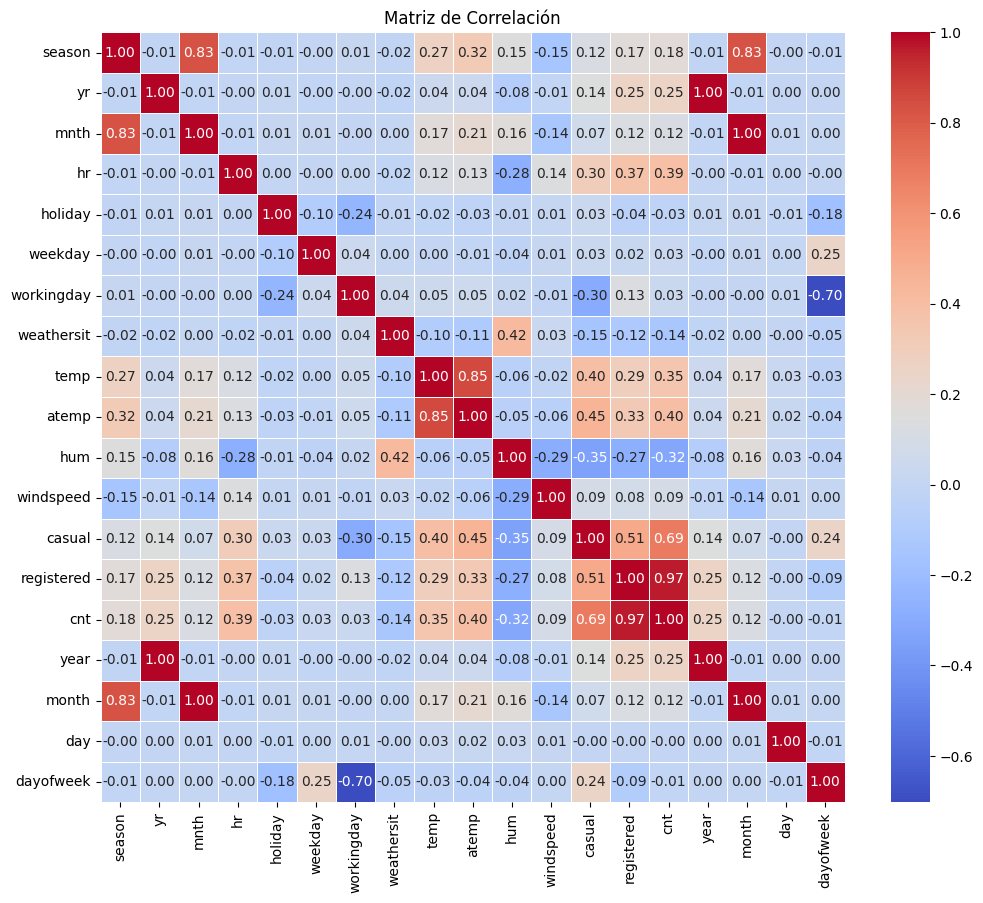

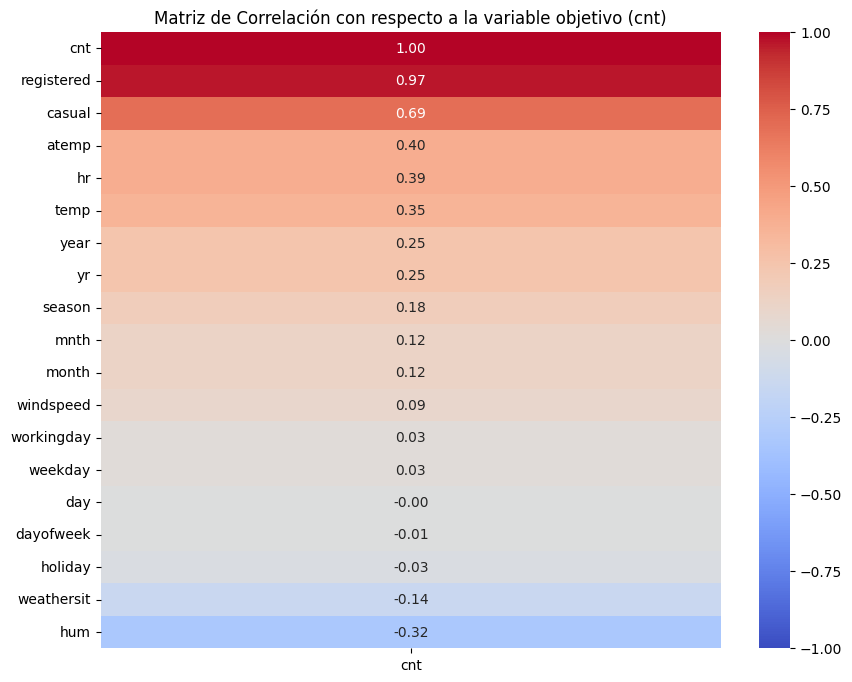

In [178]:
# Crear la matriz de correlación
correlation_matrix = df.corr()

# Configurar el gráfico
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()

# Selecciona las correlaciones relacionadas con la variable objetivo 'cnt'
target_correlation = correlation_matrix[['cnt']].sort_values(by='cnt', ascending=False)

# Configura el gráfico de calor
plt.figure(figsize=(10, 8))
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación con respecto a la variable objetivo (cnt)')
plt.show()

In [179]:
# Función para obtener estadísticas descriptivas
def get_statistics(df):
    stats = pd.DataFrame()
    stats['Tipo de Dato'] = df.dtypes
    stats['Mínimo'] = df.min()
    stats['Máximo'] = df.max()
    stats['Media'] = df.mean()
    stats['Mediana'] = df.median()
    stats['1er Cuartil (25%)'] = df.quantile(0.25)
    stats['3er Cuartil (75%)'] = df.quantile(0.75)
    return stats

# Datos descriptivos del dataset
descriptive_stats = get_statistics(df)

# Añadir descripciones manuales
descriptions = {
    'season': 'Estación (1: Primavera, 2: Verano, 3: Otoño, 4: Invierno)',
    'yr': 'Año (0: 2011, 1: 2012)',
    'mnth': 'Mes (1 a 12)',
    'hr': 'Hora (0 a 23)',
    'holiday': 'Día festivo (1: Sí, 0: No)',
    'workingday': 'Día laborable (1: Sí, 0: No)',
    'weathersit': 'Situación del clima (1: Despejado, 2: Niebla + Nubes, 3: Nieve ligera + Lluvia ligera, 4: Lluvia intensa + Niebla)',
    'temp': 'Temperatura normalizada en Celsius',
    'atemp': 'Temperatura sentida normalizada en Celsius',
    'hum': 'Humedad normalizada',
    'windspeed': 'Velocidad del viento normalizada',
    'casual': 'Número de usuarios casuales',
    'registered': 'Número de usuarios registrados',
    'cnt': 'Número total de bicicletas alquiladas (objetivo)',
    'year': 'Año (2011 o 2012)',
    'month': 'Mes (1 a 12)'
}

# Añadir descripciones al DataFrame de estadísticas descriptivas
descriptive_stats['Descripción'] = descriptive_stats.index.map(descriptions)

# Mostrar la tabla con las estadísticas descriptivas y descripciones
print(descriptive_stats)

           Tipo de Dato   Mínimo     Máximo        Media    Mediana  \
season            int64     1.00     5.0000     2.502679     3.0000   
yr                int64     0.00     1.0000     0.502679     1.0000   
mnth              int64     1.00    12.0000     6.536609     7.0000   
hr                int64     0.00    23.0000    11.546575    12.0000   
holiday           int64     0.00     2.0000     0.029956     0.0000   
weekday           int64     0.00    10.0000     3.006164     3.0000   
workingday        int64     0.00     1.0000     0.682758     1.0000   
weathersit        int64     1.00     4.0000     1.426580     1.0000   
temp            float64     0.02     8.0000     0.499435     0.5000   
atemp           float64     0.00     1.0000     0.475764     0.4848   
hum             float64     0.00     1.0000     0.627244     0.6300   
windspeed       float64     0.00     0.8507     0.190063     0.1940   
casual            int64     0.00   367.0000    35.661271    17.0000   
regist

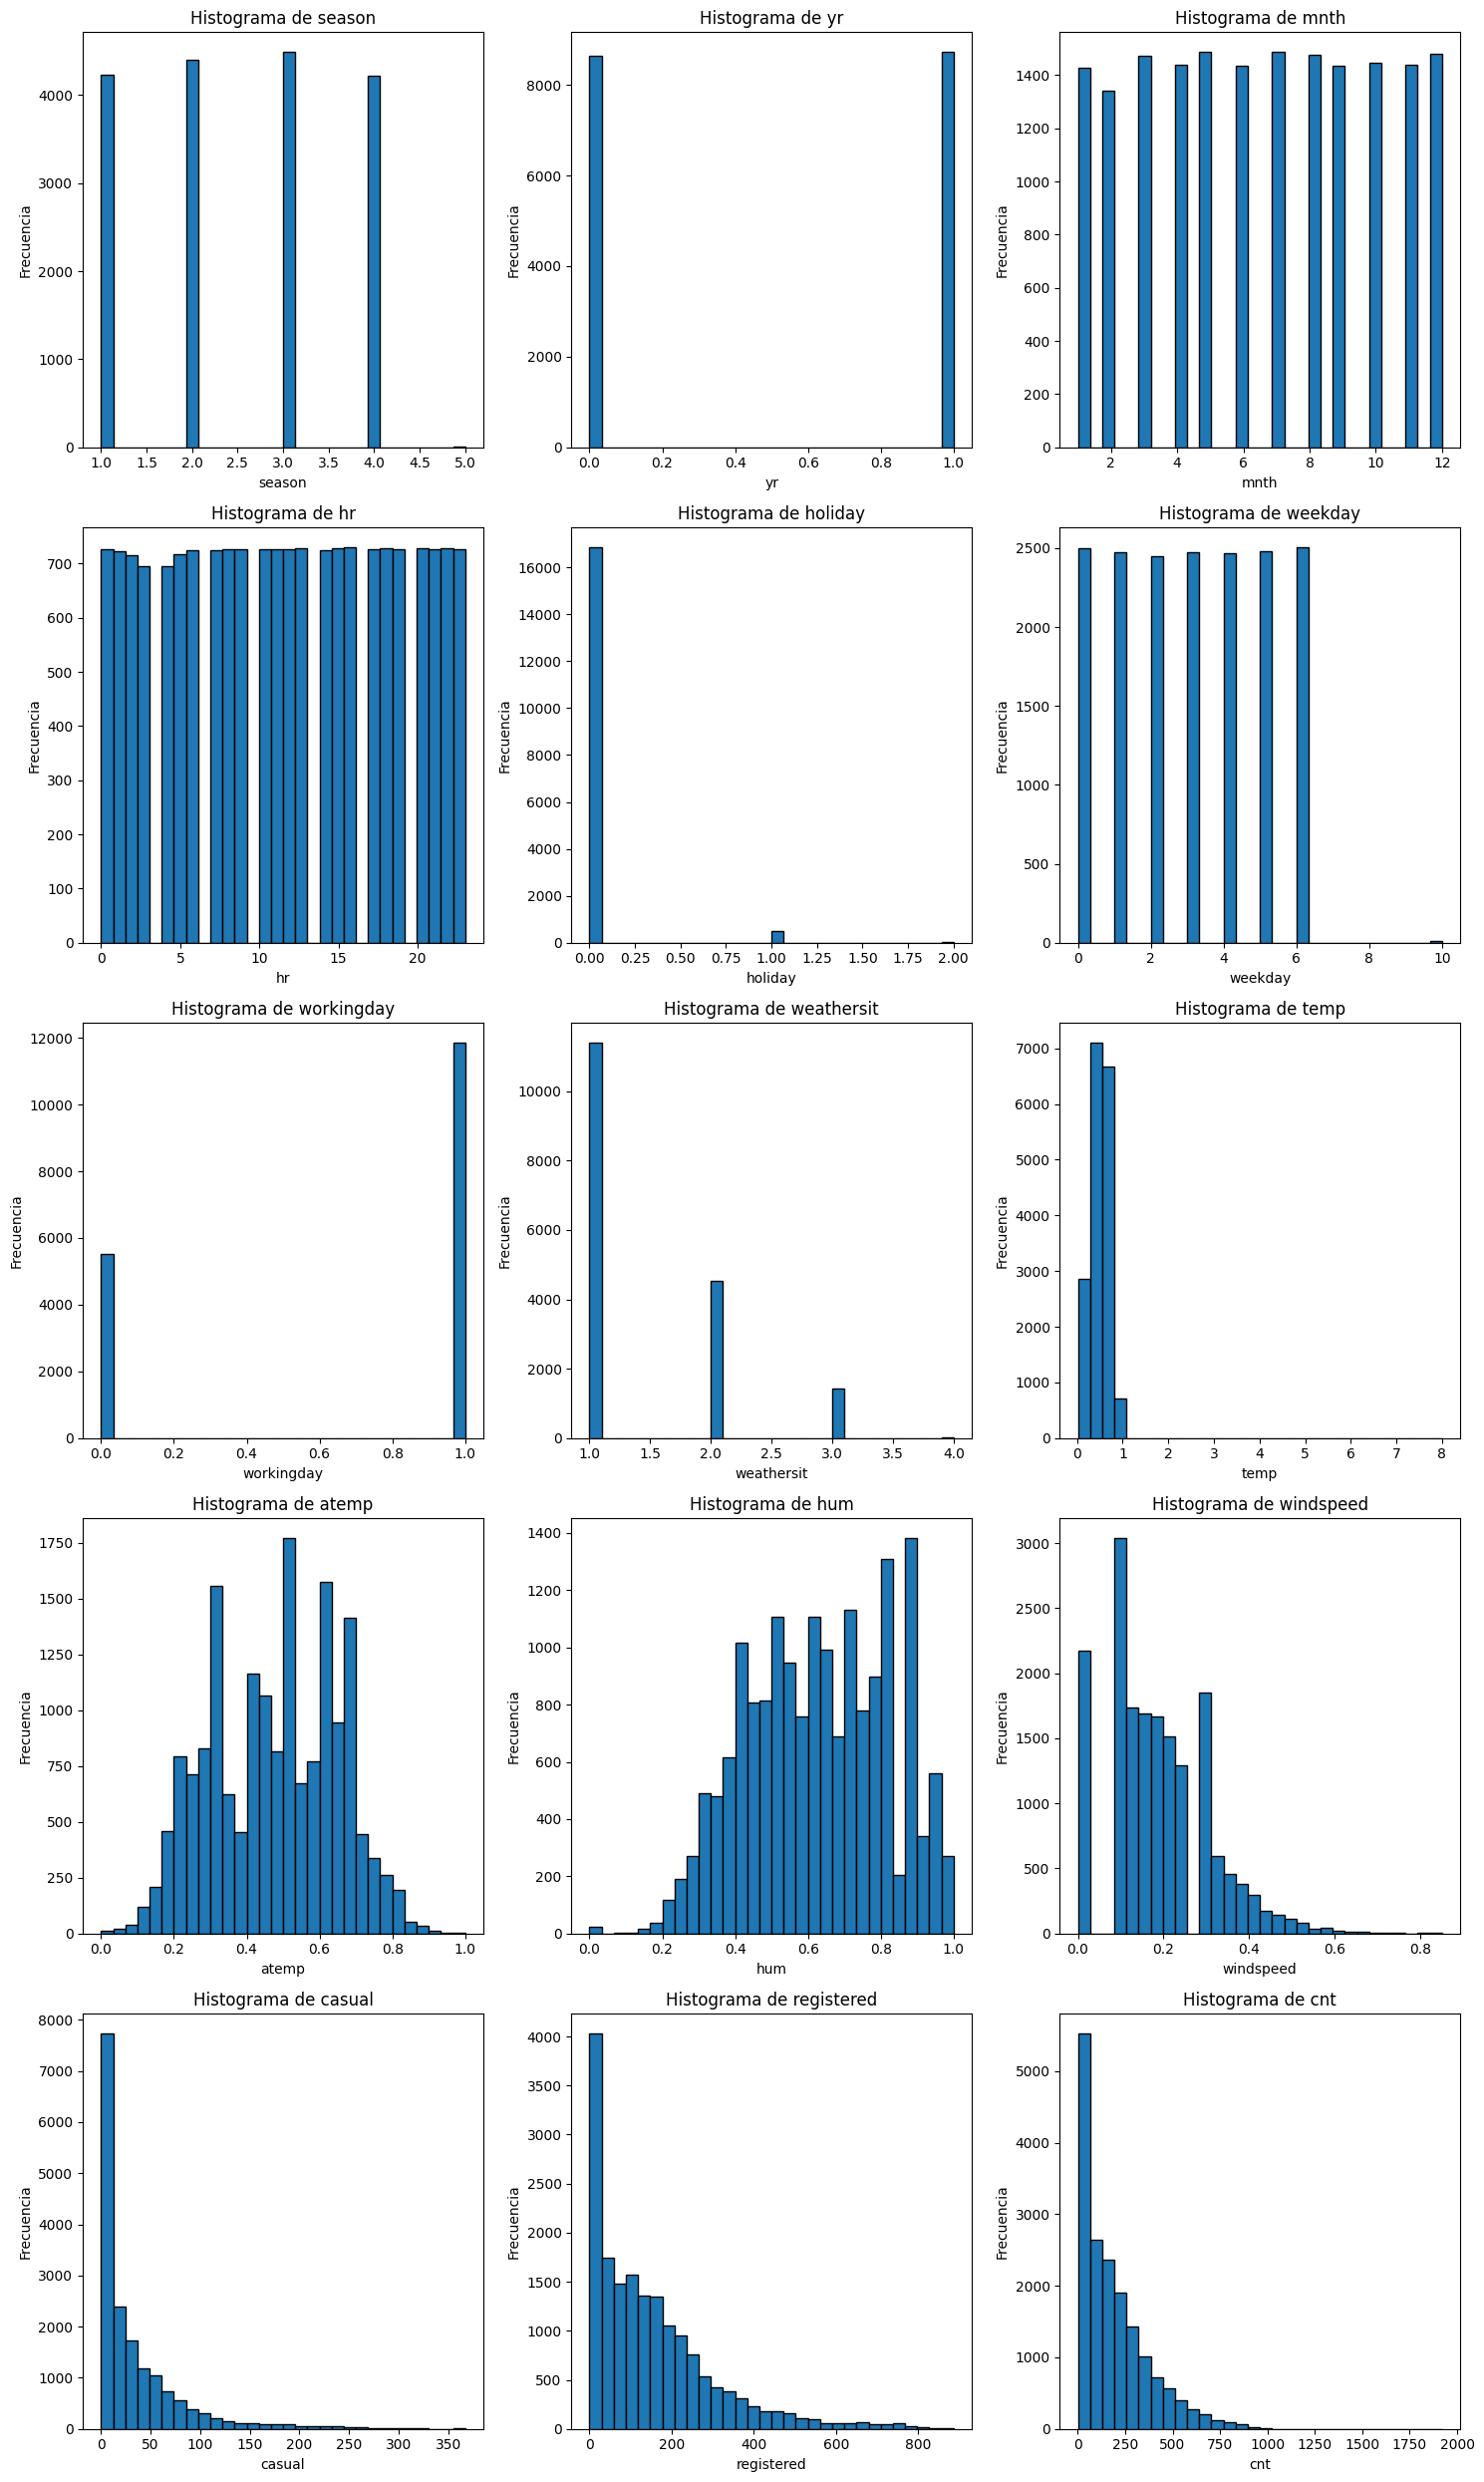

In [180]:
def plot_histograms(df):
    # Seleccionar columnas numéricas
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Crear una figura con subplots
    num_plots = len(num_cols)
    cols = 3  # Número de columnas en la figura
    rows = (num_plots // cols) + (num_plots % cols > 0)  # Número de filas en la figura

    plt.figure(figsize=(15, 5 * rows))

    for i, col in enumerate(num_cols):
        plt.subplot(rows, cols, i + 1)
        plt.hist(df[col], bins=30, edgecolor='black')
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# Llamar a la función para crear histogramas
plot_histograms(df)

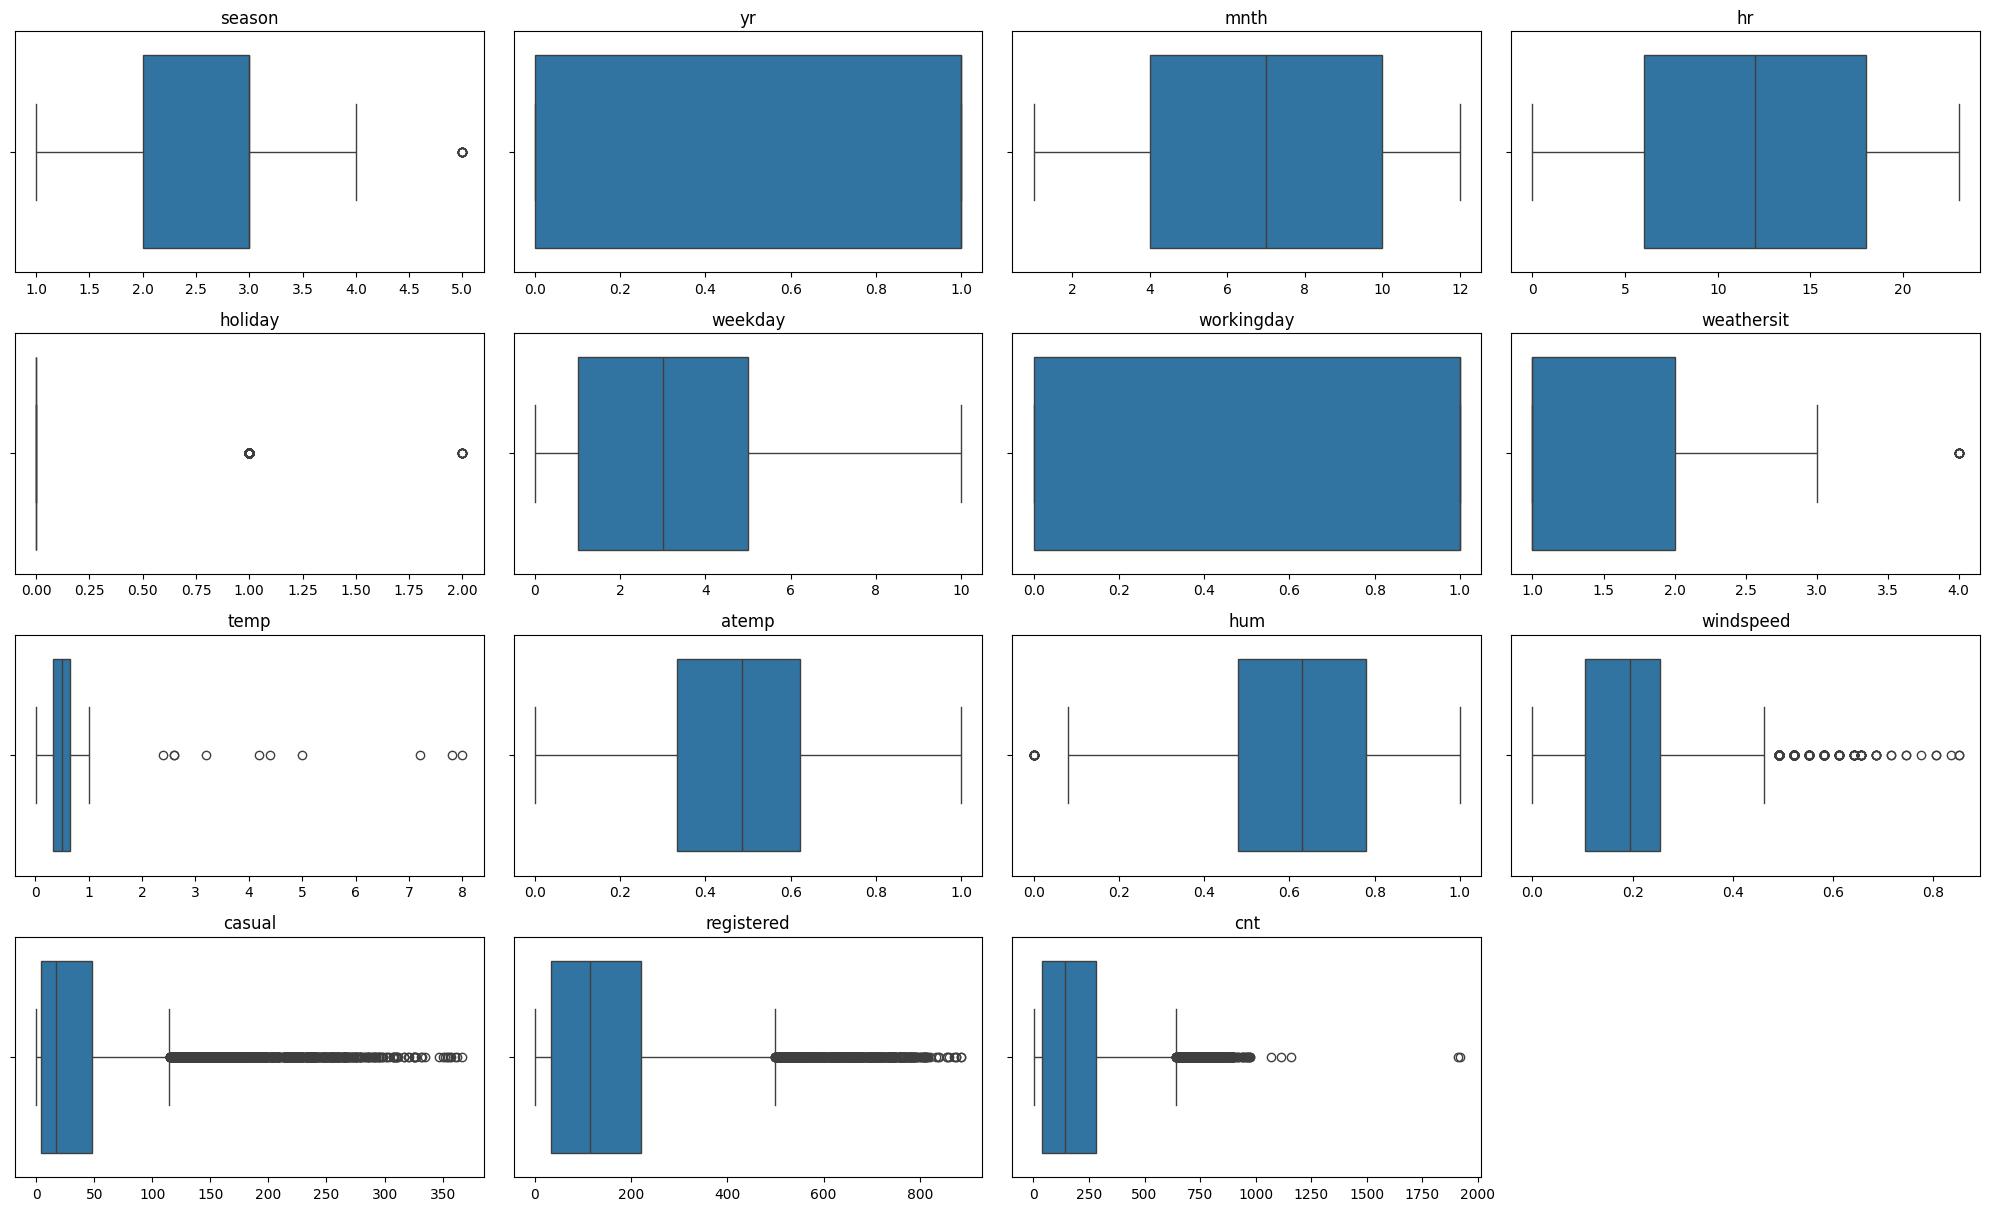

In [181]:
# Definir las columnas que deseas visualizar
columns_to_plot = [
    'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
    'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
    'registered', 'cnt'
]

# Crear gráficos de boxplot para cada columna
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_to_plot):
    plt.subplot(5, 4, i + 1)  # 5 filas, 4 columnas
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [188]:
# Función para imputar valores atípicos en una columna
def imputar_outliers(df, columna, rango_min, rango_max):
    df[columna] = np.where(df[columna] < rango_min, df[columna].median(), df[columna])
    df[columna] = np.where(df[columna] > rango_max, df[columna].median(), df[columna])

# Imputar outliers en 'season'
imputar_outliers(df, 'season', 1, 4)

# Imputar outliers en 'temp'
imputar_outliers(df, 'temp', 0, 1)

# Imputar outliers en 'hum'
# Reemplazar 0 por la mediana, ya que 0 no es un valor válido para 'hum'
df['hum'] = df['hum'].replace(0, df['hum'].median())

# Imputar outliers en 'weekday'
# Imputar valores fuera del rango de 0 a 6
imputar_outliers(df, 'weekday', 0, 6)

# Imputar outliers en 'weekday'
# Imputar valores fuera del rango de 0 a 6
imputar_outliers(df, 'holiday', 0, 1)

In [189]:
X = df.drop(columns=['cnt'])
y = df['cnt']

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
# Crear el modelo de Regresión Lineal
lin_reg = LinearRegression()

# Entrenar el modelo
lin_reg.fit(X_train, y_train)

# Hacer predicciones
y_pred_lin = lin_reg.predict(X_test)

# Calcular métricas
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Regresión Lineal - MSE: {mse_lin:.2f}, R^2: {r2_lin:.2f}")

Regresión Lineal - MSE: 673.22, R^2: 0.98


In [191]:
# Definir los valores de K a probar
k_values = [1, 3, 5, 7, 10]

# Resultados para cada valor de K
results_knn = {}

for k in k_values:
    # Crear el modelo KNN
    knn = KNeighborsRegressor(n_neighbors=k)

    # Entrenar el modelo
    knn.fit(X_train, y_train)

    # Hacer predicciones
    y_pred_knn = knn.predict(X_test)

    # Calcular métricas
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    r2_knn = r2_score(y_test, y_pred_knn)

    results_knn[k] = {'MSE': mse_knn, 'R^2': r2_knn}

# Mostrar resultados
for k, metrics in results_knn.items():
    print(f"KNN (k={k}) - MSE: {metrics['MSE']:.2f}, R^2: {metrics['R^2']:.2f}")

KNN (k=1) - MSE: 1366.76, R^2: 0.96
KNN (k=3) - MSE: 796.08, R^2: 0.97
KNN (k=5) - MSE: 765.90, R^2: 0.98
KNN (k=7) - MSE: 754.03, R^2: 0.98
KNN (k=10) - MSE: 724.03, R^2: 0.98
